### AdaBoost

In [14]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [15]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [17]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


+ Using Different Base Learners

In [19]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### XGBoost

Precision score: 1.0


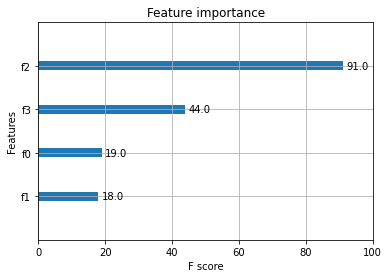

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score


iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42
)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
parameters = {
   "eta": 0.3,
   "objective": "multi:softprob",  # error evaluation for multiclass tasks
   "num_class": 3,  # number of classes to predic
   "max_depth": 3,  # depth of the trees in the boosting process
}
num_round = 20  # the number of training iterations
bst = xgb.train(parameters, dtrain, num_round)
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('Precision score:', precision_score(y_test, best_preds, average="macro"))
ax = xgb.plot_importance(bst)
ax.figure.savefig("XGBoost_fig.png")